# **UAS Big Data & Data Mining**

Rif'aa Surososastro Subekti<br>
22.11.5060<br>
BDDM 4

# Import Library & Dataset Profile

In [10]:
!pip install catboost shap

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier

file_path = 'Social_Network_Ads.csv'
data = pd.read_csv(file_path)

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


# Preprocessing

In [12]:
data_cleaned = data.drop(columns=['User ID'])
data_cleaned['Gender'] = data_cleaned['Gender'].map({'Male': 0, 'Female': 1})

X = data_cleaned.drop(columns=['Purchased'])
y = data_cleaned['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)



*   Menghapus kolom "User ID" karena tidak relevan untuk analisis.
*   "Gender" diubah menjadi numerik (0 = Male, 1 = Female).
*   Data dibagi menjadi 80% training dan 20% testing.



# Exploratory Data Analysis

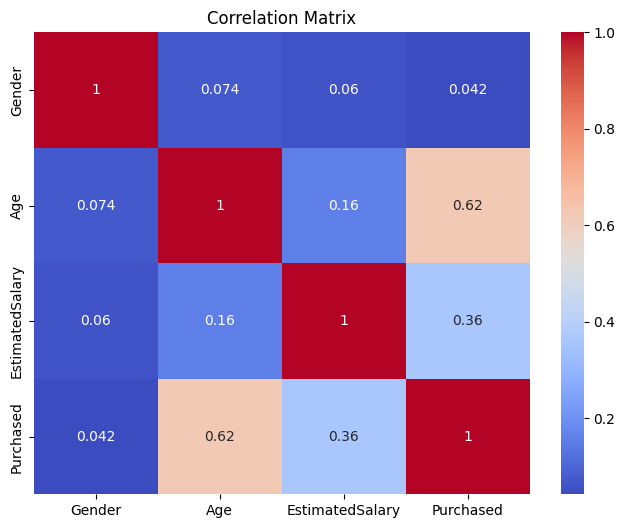

In [13]:
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



*   Age memiliki korelasi positif kuat dengan Purchased (0.62).

*   EstimatedSalary menunjukkan korelasi sedang (0.36).<br><br>
Usia adalah prediktor yang paling signifikan, sementara gaji memiliki pengaruh yang lebih kecil.



# Modeling

In [14]:
final_model = CatBoostClassifier(verbose=0, random_state=32)
final_model.fit(X_train, y_train)

# Seleksi Fitur

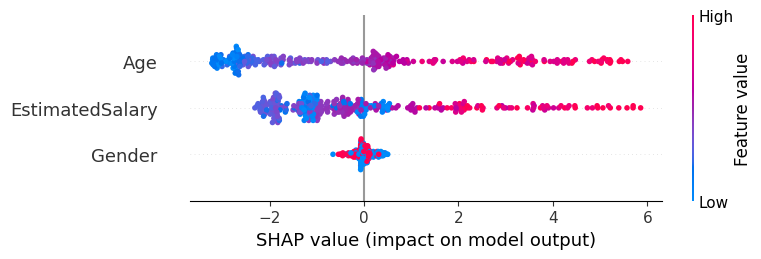

In [15]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

Age memiliki skor penting tertinggi, diikuti oleh EstimatedSalary. Sehingga kedua fitur inilah yang dipilih.

# Evaluasi Model

In [16]:
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        58
           1       0.80      0.91      0.85        22

    accuracy                           0.91        80
   macro avg       0.88      0.91      0.89        80
weighted avg       0.92      0.91      0.91        80

Accuracy: 0.91


* Accuracy tinggi (91%): Model mengklasifikasikan sebagian besar sampel dengan benar.
* Kelas 0: Performa sangat baik di semua metrik (precision, recall, f1-score).
* Kelas 1: Precision lebih rendah (0.80) dibanding recall (0.91), menunjukkan kecenderungan memprediksi lebih banyak kelas 1 (toleran terhadap False Positives).

In [17]:
import joblib

joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']